# 텍스트 마이닝 프로세스

- (1) 문장(Corpus) 데이터를 수집
- (2) 문장 데이터의 오류/ 오타를 수정
- (3) 결측치 삭제
- (4) 토큰화: 문장을 단어요소 변경
  - 단어요소: 여러단어, 한단어, 형태소(한글), 한문자, 자소(한글)
- (5) 텍스트 전처리 
  - 정규화(nomalization) : 표현 방법이 다른 단어를 통합
    - 어간추출(stemming): 문자의 원형을 추출(만들다, 만들어 -> 만들)
    - 표제어 추출(Lemimatization) 동일한 의미를 갖는 단어를 하나로 통합하는 작업 

  - 불용어 처리 (stopword) 처리: 학습에 필요없는 단어를 제거하는 작업 
  - 정규표현식을 이용한 처리
  - 내부단어 분리: 인공지능사관학교 -> 인공지능, 사관학교, 학교

- (6) 인코딩: 문자데이터를 수치데이터로 변환하는 작업 
  - one-hot encoding: 텍스트 마이닝에서는 잘 사용하지 않음
  - BoW(Bag of Word) : 텍스트를 정수로 인코딩(빈도)
  - Word Vector (Word Embedding): 텍스트를 실수로 인코딩 (확률, 기하학)

- (7) 학습 가능한 데이터로 변환
  - padding: 데이터를 같은 길이로 변환
    - 기준길이보다 긴 데이터 : 잘라줌
    - 기준길이보다 짧은 데이터 : 앞에 0을 채워서 길이를 맞춤 
  - 이진이나 다진분류라면 라벨데이터를 원핫인코딩
  - 훈련데이터와 테스트 데이터로 분리

- (8) 신경망 설계하고 학습
  - Embedding 층 : 단어들을 벡터 공간상에 배치( 단어 -> 실수로 변환), 단어들의 관계들의 특징을 추출
  - RNN층 : 문자 시계열의 특징을 추출 
  - Dense 층 : 분류기 

# 네이버 영화 리뷰 데이터 셋

- 200,000개로 구성된 데이터셋
- 긍정은 1, 부정은 0으로 라벨링 


In [2]:
from google.colab import drive

drive.mount("/content/drive")

KeyboardInterrupt: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd

dir_path="/content/drive/MyDrive/인공지능 사관학교/딥러닝/사물지능 딥러닝/data/"

#데이터 로드 (훈련:15만개, 테스트:5만개)
#데이터 구조 : id, 댓글내용 (document),label(긍정(1)/부정(0))

train_data=pd.read_table(dir_path+"ratings_train.txt")
test_data=pd.read_table(dir_path+"ratings_test.txt")

In [2]:
train_data[:5]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [3]:
#긍정과 부정의 분포
train_data["label"].value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [4]:
# 결측치 확인
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [5]:
train_data.loc[train_data["document"].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [6]:
test_data[test_data["document"].isnull()]

,id,document,label
5746,402110,NaN,1
7899,5026896,NaN,0
27097,511097,NaN,1


In [7]:
#결측치 인 데이터들을 삭제 
#how="any": 하나의 컬럼이라도 결측치가 있다면
train_data=train_data.dropna(how="any")
test_data=test_data.dropna(how="any")


In [8]:
train_data["document"].isnull().sum()

# 결측치 있는 개수 다 더해보기 (숫자 세기)

0

In [9]:
test_data["document"].isnull().sum()

0

- 댓글내용에서 한글만 추출


In [10]:
# 한글과 공백이 아닌 값들은 삭제: [^ㄱ-ㅎㅏ-ㅣ가-힣]
train_data["document"]=train_data["document"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data["document"]=test_data["document"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
test_data[:5]

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0


In [12]:
train_data[:5]

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [14]:
test_data.loc[test_data["document"]==""]

,id,document,label
1,9274899,,0
116,6910486,,1
254,4976468,,0
468,7517102,,0
504,2096424,,0
...,...,...,...
49413,9027358,,1
49563,2192893,,0
49803,5309713,,1
49871,9767991,,0


In [15]:
train_data.loc[train_data["document"]==""]

,id,document,label
584,7117896,,0
593,6478189,,0
638,9364602,,0
668,1600635,,0
1058,5890638,,0
...,...,...,...
149358,6780491,,0
149364,8014701,,1
149718,7690797,,1
149862,7175749,,0


In [16]:
# 빈데이터가있는 행을 삭제 
#document 컬럼의 값이 "" 아닌 데이터만 저장 
train_data=train_data[train_data["document"] !=""]
test_data=test_data[test_data["document"] !=""]

In [17]:
train_data.loc[train_data["document"].str.strip()==""]

,id,document,label
404,4221289,,0
412,9509970,,1
470,10147571,,1
1312,5831045,,0
1549,7246718,,1
...,...,...,...
148549,9715918,,1
148566,10110521,,0
149309,6715725,,1
149630,3508604,,0


# 토큰화 및 불용어 처리 
- 토큰화 : 문장을 단어로 분리하는 작업
  - 문장-> 여러 단어로 분리
  - 문장 -> 하나의 단어로 분리
  - 문장 -> 하나의 형태소로 분리(한글)
  - 문장-> 하나의 문자로 분리(한글, 한문)
  - 문장-> 하나의 자소로 분리 (한글)

-불용어(stop word)처리: 학습에 필요없는 단어를 삭제하는 작업 

In [18]:
# 한글 자연어 처리 라이브러리 
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 50.2 MB/s 


In [19]:
import konlpy
from konlpy.tag import Okt

okt=Okt() # 형태소 분석기

X_train=[]

# 불용어 리스트
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in train_data["document"]:
  temp_X=[]

  #댓글을 하나씩 읽어와서 형태소 분리 
  #stem=True: 정규화 (만든, 만들어, 만들고, ->만들다)
  temp_X=okt.morphs(sentence,stem=True)

  # 불용어 처리 
  temp_X=[word for word in temp_X if word not in stopwords]

  X_train.append(temp_X)

In [20]:
X_test=[]

# 불용어 리스트
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in test_data["document"]:
  temp_X=[]

  #댓글을 하나씩 읽어와서 형태소 분리 
  #stem=True: 정규화 (만든, 만들어, 만들고, ->만들다)
  temp_X=okt.morphs(sentence,stem=True)

  # 불용어 처리 
  temp_X=[word for word in temp_X if word not in stopwords]

  X_test.append(temp_X)

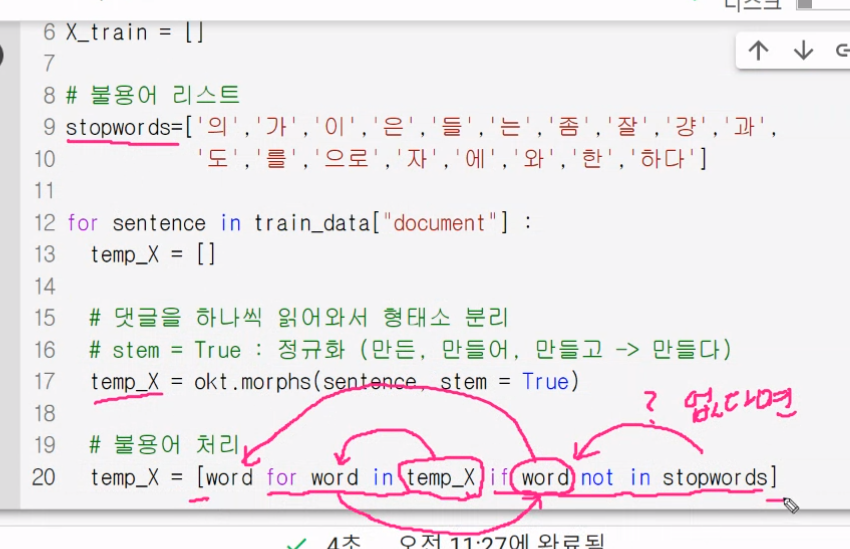

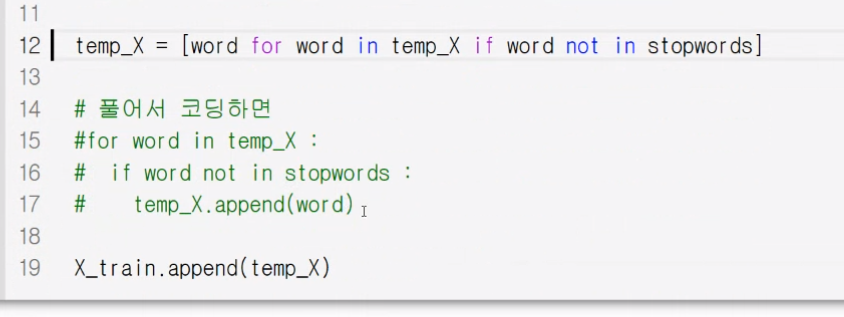

In [21]:
import pickle

file_path_train=dir_path+"train2.txt"
file_path_test=dir_path+"test2.txt"

with open(file_path_train,"wb")as f:
  pickle.dump(X_train, f)

with open(file_path_test,"wb")as f:
  pickle.dump(X_test, f)
  

In [22]:
import pickle
# 중간 저장된 결과 불러오기 
X_train2=[]
X_test2=[]

with open(file_path_train, "rb") as f:
  X_train2=pickle.load(f)

with open(file_path_test, "rb") as f:
 X_test2=pickle.load(f)

In [23]:
print(X_train2[:3])

[['아', '더빙', '진짜', '짜증나다', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]


# 인코딩 (encoding)

  - 형태소를 학습을 위해 수치 데이터로 변환하는 작업
  - 빈도수, 확률등을 활용 

In [24]:
from IPython.core.displayhook import tokenize
from tensorflow.keras.preprocessing.text import Tokenizer

# 사용할 최대 단어수 (빈도수가 높은순)

max_feature=35000

# 초기화
tokenizer= Tokenizer(num_words=max_feature)

# 빈도수 분석 
tokenizer.fit_on_texts(X_train2)

# 분석된 빈도수를 기반으로 각 단어에 인덱스를 부여 
X_train=tokenizer.texts_to_sequences(X_train2)
# 테스트 데이터는 훈련데이터의 분석을 이용하여 인코딩 
X_test=tokenizer.texts_to_sequences(X_test2)

In [25]:
X_train[:3]

[[50, 457, 16, 260, 660],
 [919, 459, 41, 599, 1, 214, 1455, 24, 965, 676, 19],
 [386, 2452, 25024, 2319, 5676, 2, 221, 9]]

In [26]:
# 음악, 언어등의 데이터는 학습을 시킬려면 같은 길이로 만들어 주어야한다.


- 신경망으로 학습을 하려면 길이를 동일하게 만들어 주어야한다. 
  - 긴데이터: 잘라서 저장
  - 짧은 데이터: 뒤에 0을 채워서 저장 


In [27]:
# 인코딩된 텍스트 데이터를 같은 길이로 만들어줌
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 신경망에 입력되는 길이 
max_word=30

X_train=pad_sequences(X_train, maxlen=max_word)
X_test=pad_sequences(X_test,maxlen=max_word)


In [28]:
X_train[:3]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,    50,   457,
           16,   260,   660],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,   919,   459,    41,   599,     1,   214,  1455,    24,
          965,   676,    19],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,   386,  2452, 25024,  2319,  5676,
            2,   221,     9]], dtype=int32)

In [29]:
y_train=train_data["label"]
y_test=test_data["label"]

In [30]:
# 현재 라벨값은 어짜피 0,1 의 이진분류형태이기 때문에 원핫인코딩을 하지 않겠다. 


# 신경망 설계

- Embedding(): 텍스트 데이터에서 특성을 추출하는 기능(백터공간 데이터 값, 단어사전)
- LSTM(): 시계열에서 시간의 흐름에 따른 특성을 추출하는 기능 

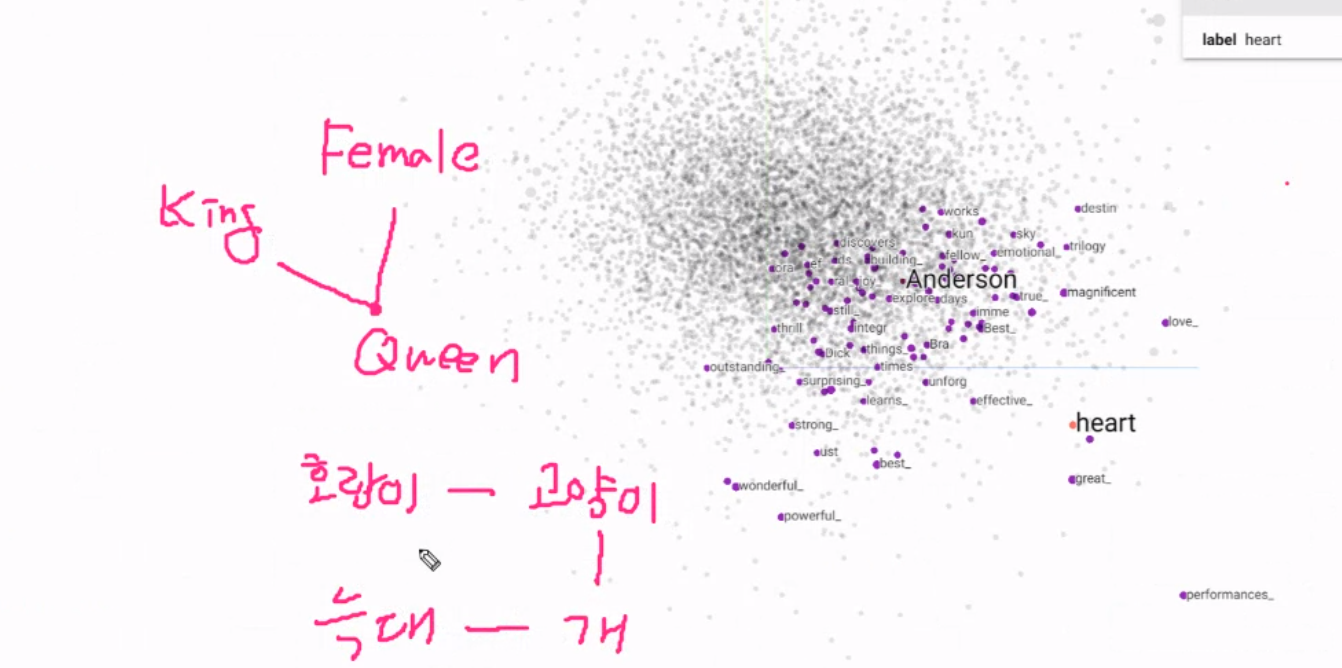

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Embedding, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [32]:
model1=Sequential()

# 텍스트의 특성 추출기
# (사용할 최대 단어수, 차원수, 입력데이터의 길이)
# 차원수: 하나의 단어가 연결된 단어의 수
model1.add(Embedding(max_feature, 100, input_length=max_word))

#텍스트는 시계열 성격을 가지고 있어서 시계열 특성을 추출
model1.add(LSTM(128))

#분류기
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           3500000   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 3,617,377
Trainable params: 3,617,377
Non-trainable params: 0
_________________________________________________________________


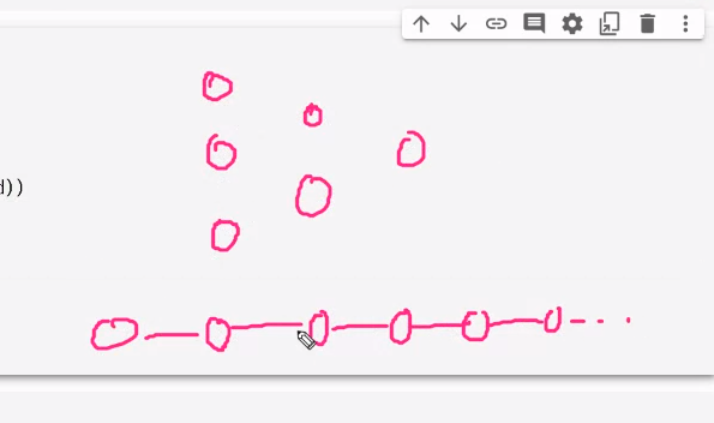

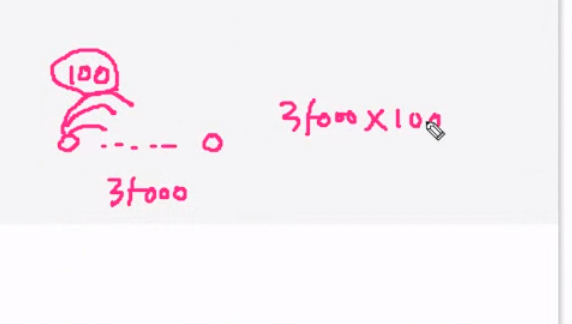

In [33]:
model1.compile(loss="binary_crossentropy",optimizer="rmsprop", metrics=["accuracy"])

In [35]:
# 더이상 학습이 진행되지 않으면 학습을 중단
es=EarlyStopping(monitor="val_accuracy", patience=5)

# 저장할 위치 
save_path="/content/drive/MyDrive/인공지능 사관학교/딥러닝/사물지능 딥러닝/model/"
file_name= save_path+ "model_review_{epoch:02d}_{accuracy:.2f}_{val_accuracy:.2f}.h5"

# 가장 좋은 모델만 저장
mcp=ModelCheckpoint(file_name, save_best_only=True, monitor="val_accuracy")
h1=model1.fit(X_train, y_train, epochs=5, batch_size=60, validation_data=(X_test, y_test),callbacks=[es,mcp])

Epoch 1/5
2487/2487 [==============================] - 21s 8ms/step - loss: 0.3205 - accuracy: 0.8612 - val_loss: 0.3409 - val_accuracy: 0.8551
Epoch 2/5
2487/2487 [==============================] - 19s 8ms/step - loss: 0.2957 - accuracy: 0.8758 - val_loss: 0.3311 - val_accuracy: 0.8587
Epoch 3/5
2487/2487 [==============================] - 20s 8ms/step - loss: 0.2758 - accuracy: 0.8862 - val_loss: 0.3295 - val_accuracy: 0.8577
Epoch 4/5
2487/2487 [==============================] - 19s 8ms/step - loss: 0.2587 - accuracy: 0.8952 - val_loss: 0.3383 - val_accuracy: 0.8568
Epoch 5/5
2487/2487 [==============================] - 19s 8ms/step - loss: 0.2426 - accuracy: 0.9027 - val_loss: 0.3407 - val_accuracy: 0.8574


In [36]:
X_train.shape, y_train.shape

((149186, 30), (149186,))

In [37]:
# 저장된 모델 중에서 가장좋은 모델 불러오기
from tensorflow.keras.models import load_model
import numpy as np

#val_accuracy가 가장 높은 모델의 epoch 검색
best_model_epoch=np.argmax(np.array(h1.history["val_accuracy"]))+1 

# 검색된 모델을 가져온다. 
best_model=load_model(save_path+"model_review_01_0.86_0.86.h5")

In [40]:
# 예측하기 
index=120

pred=model1.predict(X_test)

print(y_test[index])
print(np.where(np.average(pred)>0.5,"긍정","부정"))

1554/1554 [==============================] - 5s 3ms/step
0
긍정
